In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings.csv']))

In [10]:
df.shape

(119390, 32)

In [4]:
pd.set_option('display.max_columns', None)
print(df.head())
pd.reset_option('display.max_columns')

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
print(df.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Analytics)
# Seasonal Booking Analysis:
1- Number of bookings by month, week & weekday
2- Number of bookings by month, week & weekday grouped by country of region

In [11]:
# Datetime Conversion:

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

print(df['arrival_date'].head())

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]


In [12]:
df['Month'] = df['arrival_date'].dt.month_name()
print(df['Month'])

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: Month, Length: 119390, dtype: object


In [13]:
num_of_booking_in_month = df.groupby('Month')['lead_time'].count()
print(num_of_booking_in_month) # Number of bookings by month

Month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: lead_time, dtype: int64


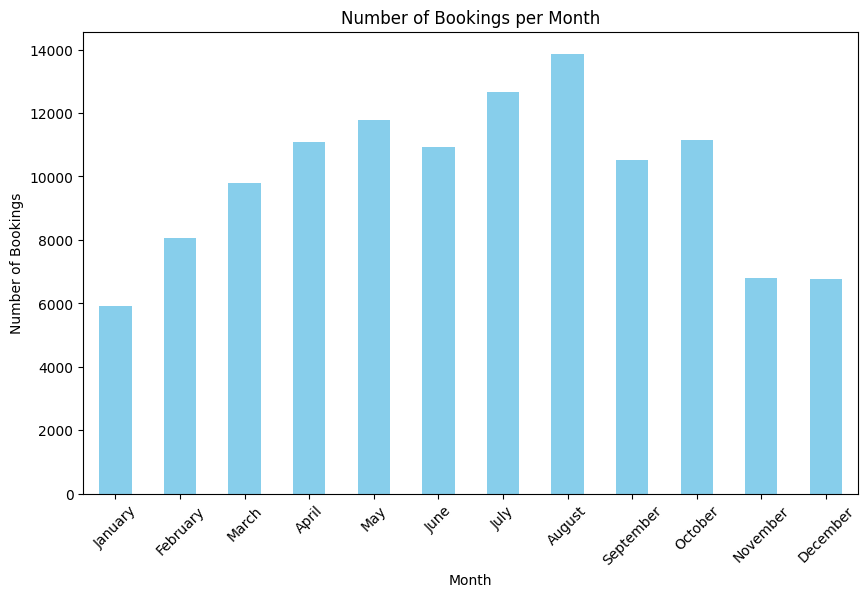

In [14]:
# Visualization:

import matplotlib.pyplot as plt
import seaborn as sns
num_of_booking_in_month = num_of_booking_in_month.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize = (10, 6))
num_of_booking_in_month.plot(kind = 'bar', color = 'skyblue')

plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation = 45)
plt.show()


In [15]:
# Extract the week number from the 'arrival_date' column:

df['Week'] = df['arrival_date'].dt.isocalendar().week
print(df[['Week']].head())


   Week
0    27
1    27
2    27
3    27
4    27


In [ ]:
num_of_booking_in_week = df.groupby('Week')['lead_time'].count()
print(num_of_booking_in_week) # Number of booking by week

Week
1     1183
2     1218
3     1464
4     1462
5     1630
6     1846
7     2089
8     2357
9     2020
10    1988
11    2389
12    2219
13    2043
14    2734
15    2520
16    2582
17    2810
18    2657
19    2604
20    2907
21    2589
22    2644
23    2694
24    2595
25    2389
26    2315
27    2658
28    2812
29    2871
30    2961
31    2850
32    3164
33    3653
34    2921
35    2455
36    2219
37    2337
38    2693
39    2608
40    2506
41    2919
42    2567
43    2392
44    2079
45    1699
46    1363
47    1572
48    1539
49    1738
50    1205
51    1048
52    1708
53     905
Name: lead_time, dtype: int64


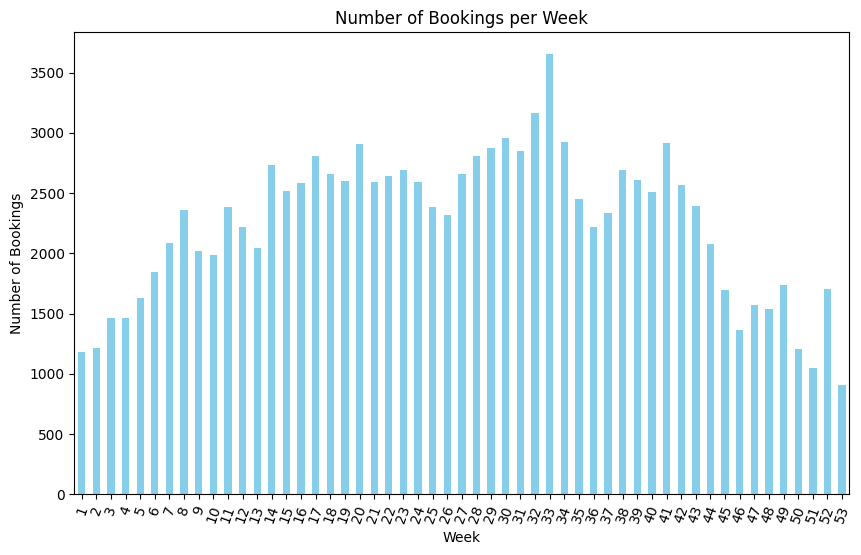

In [ ]:
# Visualization:

plt.figure(figsize = (10, 6))
num_of_booking_in_week.plot(kind = 'bar', color = 'skyblue')

plt.title('Number of Bookings per Week')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation = 70, ha = 'center')
plt.gca().margins(x = 0.01)
plt.show()


In [16]:
# 0: Monday
# 1: Tuesday
# 2: Wednesday
# 3: Thursday
# 4: Friday
# 5: Saturday
# 6: Sunday

df['Weekday'] = df['arrival_date'].dt.weekday

df['Week_Name'] = df['arrival_date'].dt.day_name()

In [ ]:
num_of_booking_in_weekname = df.groupby('Week_Name')['lead_time'].count()
num_of_booking_in_weekday = df.groupby('Weekday')['lead_time'].count()

print(num_of_booking_in_weekname)
print(num_of_booking_in_weekday) # Number of bookings in weekday

Week_Name
Friday       19631
Monday       18171
Saturday     18055
Sunday       14141
Thursday     19254
Tuesday      13999
Wednesday    16139
Name: lead_time, dtype: int64
Weekday
0    18171
1    13999
2    16139
3    19254
4    19631
5    18055
6    14141
Name: lead_time, dtype: int64


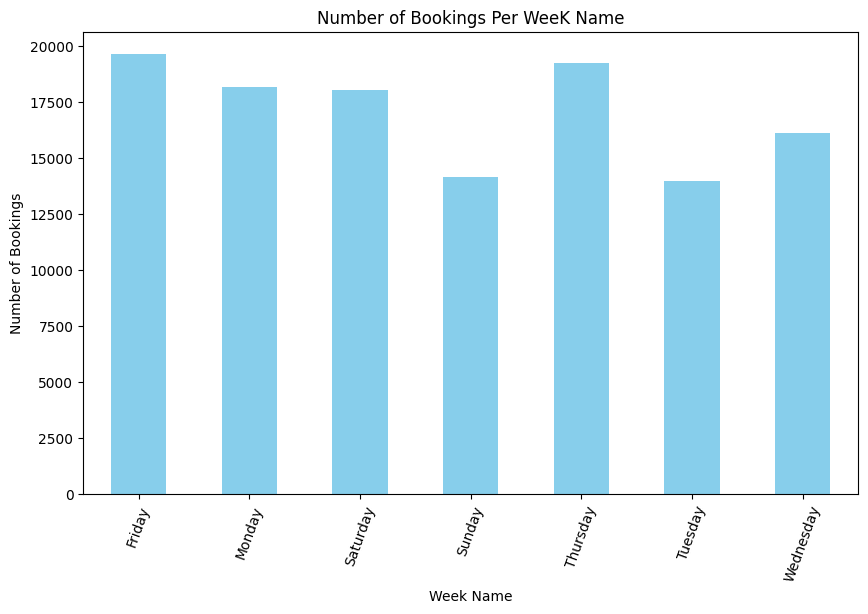

In [ ]:
# Visualization:

plt.figure(figsize = (10, 6))
num_of_booking_in_weekname.plot(kind = 'bar', color = 'skyblue')

plt.title('Number of Bookings Per WeeK Name')
plt.xlabel('Week Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation = 70, ha = 'center')
plt.gca().margins(x = 0.01)
plt.show()

In order to answer the second question, Missing values of 'country' column must be treated first. However, since the number of unique values of country column is high I am going to define a custom mapping which map each of the existing country to its continent.

In [17]:
# Custom Mapping:
# Because unique values of the country column are so high (177) I will do a custom mapping to map each country to its specified continent in the dictionary.

country_to_region = {
    'USA': 'North America', 'CAN': 'North America', 'MEX': 'North America',
    'GBR': 'Europe', 'FRA': 'Europe', 'DEU': 'Europe', 'ESP': 'Europe', 'IRL': 'Europe', 'PRT': 'Europe',
    'ROU': 'Europe', 'NOR': 'Europe', 'POL': 'Europe', 'CHE': 'Europe', 'GRC': 'Europe', 'ITA': 'Europe',
    'NLD': 'Europe', 'DNK': 'Europe', 'RUS': 'Europe', 'SWE': 'Europe', 'AUT': 'Europe', 'BLR': 'Europe',
    'LUX': 'Europe', 'SVN': 'Europe', 'ALB': 'Europe', 'SMR': 'Europe', 'MNE': 'Europe', 'KOS': 'Europe',
    'CZE': 'Europe', 'SVK': 'Europe', 'HRV': 'Europe', 'HUN': 'Europe', 'EST': 'Europe', 'LVA': 'Europe',
    'LTU': 'Europe', 'BGR': 'Europe', 'GIB': 'Europe', 'AND': 'Europe', 'MLT': 'Europe', 'ISL': 'Europe',
    'MAC': 'Asia', 'KOR': 'Asia', 'CRI': 'North America', 'JPN': 'Asia', 'KAZ': 'Asia', 'PAK': 'Asia',
    'IDN': 'Asia', 'LBN': 'Asia', 'PHL': 'Asia', 'SGP': 'Asia', 'THA': 'Asia', 'VNM': 'Asia', 'HKG': 'Asia',
    'TWN': 'Asia', 'CHN': 'Asia', 'IRN': 'Asia', 'OMN': 'Asia', 'ARE': 'Asia', 'IRQ': 'Asia', 'JOR': 'Asia',
    'SYR': 'Asia', 'ARM': 'Asia', 'GEO': 'Asia', 'AZE': 'Asia', 'ARM': 'Asia',
    'AUS': 'Oceania', 'NZL': 'Oceania', 'PNG': 'Oceania', 'FJI': 'Oceania', 'SLB': 'Oceania', 'VUT': 'Oceania',
    'WLF': 'Oceania', 'PYF': 'Oceania', 'KIR': 'Oceania', 'SAM': 'Oceania', 'TON': 'Oceania', 'NCL': 'Oceania',
    'ZAF': 'Africa', 'NGA': 'Africa', 'EGY': 'Africa', 'KEN': 'Africa', 'ETH': 'Africa', 'DZA': 'Africa',
    'UGA': 'Africa', 'Tanzania': 'Africa', 'GHA': 'Africa', 'CMR': 'Africa', 'CIV': 'Africa', 'MUS': 'Africa',
    'ZMB': 'Africa', 'MWI': 'Africa', 'NAM': 'Africa', 'MLI': 'Africa', 'BFA': 'Africa', 'TGO': 'Africa',
    'GNB': 'Africa', 'SLE': 'Africa', 'STP': 'Africa', 'AGO': 'Africa', 'BEN': 'Africa', 'BWA': 'Africa',
    'LSO': 'Africa', 'SWZ': 'Africa', 'SDN': 'Africa', 'SOM': 'Africa', 'MDG': 'Africa', 'REU': 'Africa',
    'DJI': 'Africa', 'ERI': 'Africa', 'GAB': 'Africa', 'COM': 'Africa', 'MRT': 'Africa', 'BWA': 'Africa',
    'SYR': 'Asia', 'HUN': 'Europe', 'AIA': 'Caribbean', 'ABW': 'Caribbean', 'BRB': 'Caribbean', 'GUY': 'South America',
    'PYF': 'Oceania', 'ATA': 'Antarctica', 'GLP': 'Caribbean', 'DMA': 'Caribbean', 'LCA': 'Caribbean',
    'SUR': 'South America', 'BRB': 'Caribbean', 'BOL': 'South America', 'PRY': 'South America', 'GUY': 'South America',
    'VGB': 'Caribbean', 'TCA': 'Caribbean', 'JAM': 'Caribbean', 'ATF': 'Antarctica', 'FRO': 'Europe',
    'UMI': 'Oceania', 'MTQ': 'Caribbean', 'BES': 'Caribbean', 'SXM': 'Caribbean', 'GUF': 'South America',
    'SPM': 'Caribbean', 'MNP': 'Oceania', 'RMI': 'Oceania', 'FSM': 'Oceania'

}

df['Region'] = df['country'].map(country_to_region)
df['Region'].fillna('Unknown', inplace = True)
num_of_bookings_per_region = df.groupby(['Region', 'Month'])['lead_time'].count().reset_index()


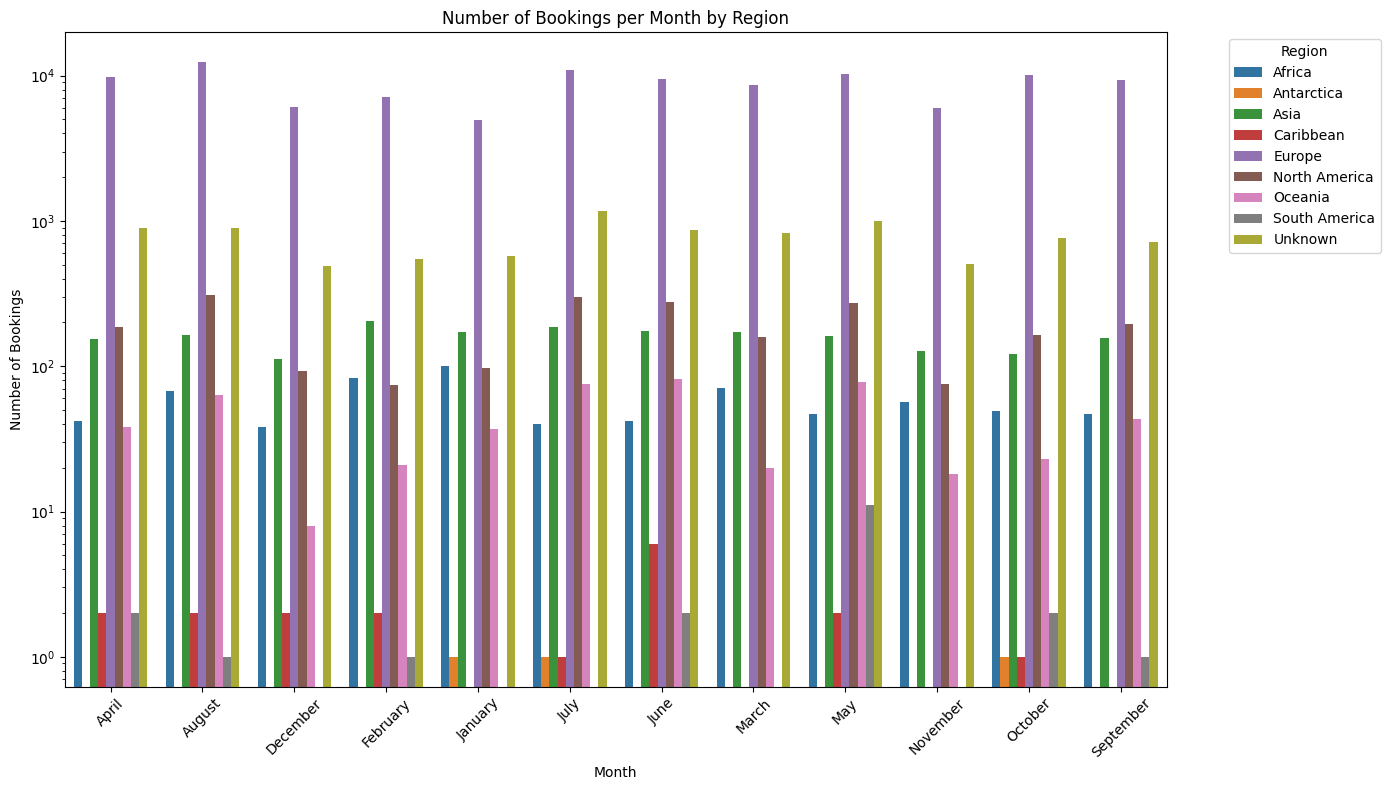

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.barplot(x = 'Month', y = 'lead_time', hue = 'Region', data = num_of_bookings_per_region, palette = 'tab10')
plt.title('Number of Bookings per Month by Region')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.yscale('log')
plt.xticks(rotation = 45)
plt.legend(title = 'Region', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()
